In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['svg.fonttype'] = 'none'

import sys
sys.path.append('../Modules/polaritymodel')
sys.path.append('..')
from Model import Model
import pandas as pd

In [2]:
params = [[1, 0.005], [0.1, 0.005], [0.1, 0.05], [0.1, 0.0005], [0.01, 0.005]]

### Simulate

In [3]:
def simulate(p):
    
    # Simulate segregation
    m = Model(Dm=p[0], kon=p[1], koff=p[1], psi=0.174, tot=1.56, xsteps=100, noise=0)
    soln, _, _, _ = m.run(Tmax=500)
    soln_segregation = soln[0]
    
    # Simulate relaxation
    soln, _, _, _ = m.run(start=soln_segregation, flow=False, Tmax=300)    
    soln_relaxation = soln[0]
    
    return [soln_segregation, soln_relaxation]

In [4]:
solns = [simulate(p) for p in params]

### Figures

In [5]:
def create_fig(soln):
    fig, ax = plt.subplots()
    nc = (1 * 1.56) / (1 + 0.174 * 1)
    ax.plot(np.linspace(0, 60, 100), soln[0] / nc, c='tab:orange', label='End of flow')
    ax.plot(np.linspace(0, 60, 100), soln[1] / nc, c='tab:blue', label='End of maintenance')
    ax.tick_params(axis='both', labelsize=8)
#     ax.set_xlabel('Position (µm)')
    ax.set_xticks([0, 60])
    ax.set_yticks([0, 1, 2, 3])
    ax.set_xticklabels(['A', 'P'])
    ax.set_ylabel('Normalised concentration', fontsize=8)
    ax.set_ylim(0, 3)
    ax.legend(frameon=False, fontsize=6, loc=3)
    
    fig.set_size_inches(2.5, 1.8)
    fig.tight_layout()  
    return fig, ax

[1, 0.005]


<IPython.core.display.Javascript object>


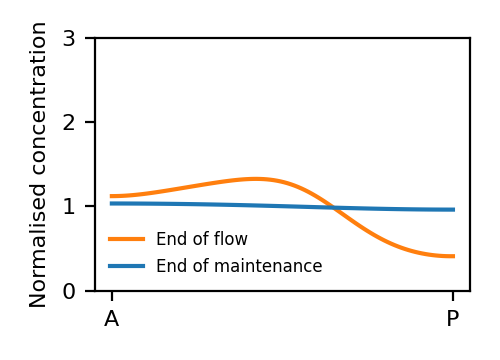

[0.1, 0.005]


<IPython.core.display.Javascript object>


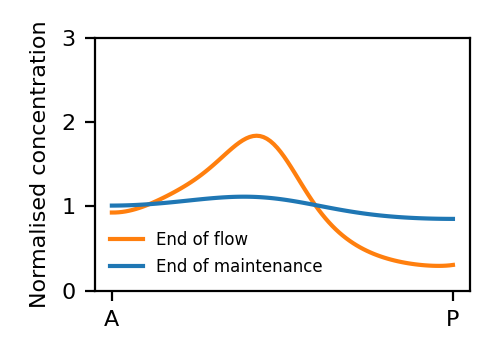

[0.1, 0.05]


<IPython.core.display.Javascript object>


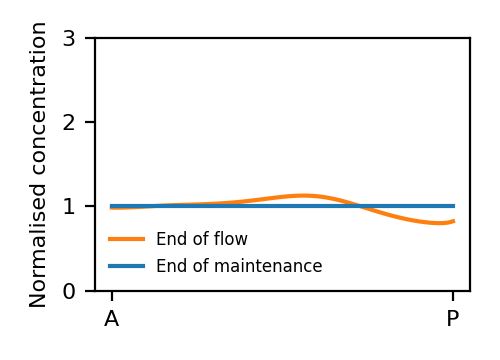

[0.1, 0.0005]


<IPython.core.display.Javascript object>


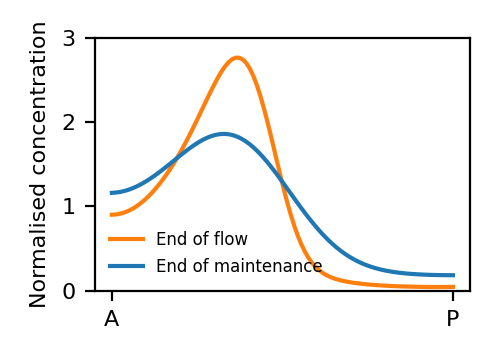

[0.01, 0.005]


<IPython.core.display.Javascript object>


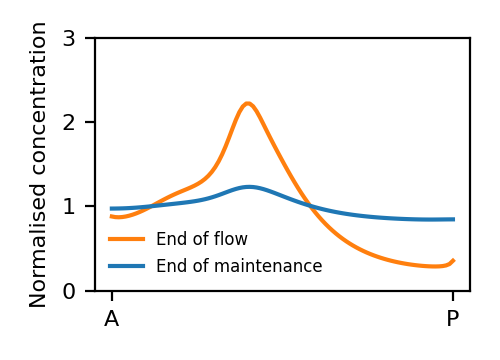

In [6]:
for s, p in zip(solns, params):
    print(p)
    fig, ax = create_fig(s)
    fig.savefig('Figs/profiles_%s_%s.png' % (p[0], p[1]), dpi=600, transparent=True)
    fig.savefig('Figs/profiles_%s_%s.svg' % (p[0], p[1]), dpi=600, transparent=True)

### Figures - v2

In [7]:
def flow(A=74, B=391, C=1000, D=100):
    X = np.linspace(0, 60, 100)
    part1 = ((X / A) * np.exp(-(X ** 2) / B))
    part2 = (((X - 60) / C) * np.exp(-((X - 60) ** 2) / D))
    Y = part1 + part2
    return Y[::-1]

def create_fig_v2(soln):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    ax2.plot(np.linspace(0, 60, 100), flow(), c='0.8', linestyle='--')
    nc = (1 * 1.56) / (1 + 0.174 * 1)
    ax1.plot(np.linspace(0, 60, 100), soln[0] / nc, c='tab:orange', label='End of flow')
    ax1.plot(np.linspace(0, 60, 100), soln[1] / nc, c='tab:blue', label='300s post flow')
    
    ax1.tick_params(axis='both', labelsize=8)
    ax2.tick_params(axis='both', labelsize=8)
    ax1.set_xticks([0, 60])
    ax1.set_yticks([0, 1, 2, 3])
    ax1.set_xticklabels(['A', 'P'])
    ax1.set_ylabel('Normalised concentration', fontsize=8)
    ax2.set_ylabel('Flow velocity (µm/s)', fontsize=8, color='0.6')
    ax1.set_ylim(0, 3)
    ax1.legend(frameon=False, fontsize=6, loc=3)
    ax1.spines['right'].set_color('0.6')
    ax2.tick_params(axis='y', colors='0.6')
    
    fig.set_size_inches(3, 1.8)
    fig.tight_layout()  
    return fig, ax1, ax2

[1, 0.005]


<IPython.core.display.Javascript object>


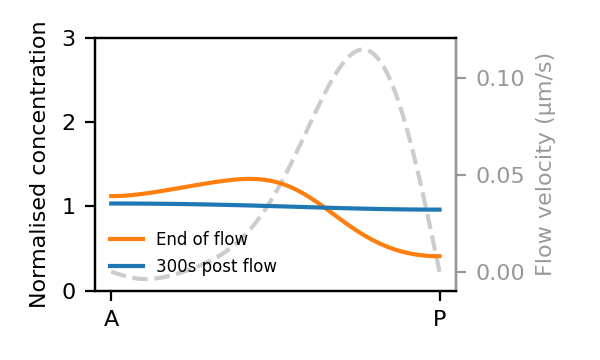

[0.1, 0.005]


<IPython.core.display.Javascript object>


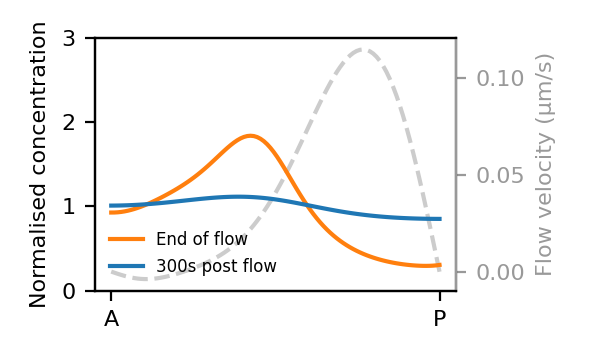

[0.1, 0.05]


<IPython.core.display.Javascript object>


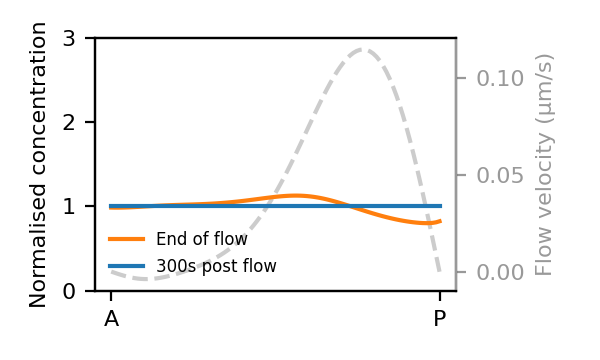

[0.1, 0.0005]


<IPython.core.display.Javascript object>


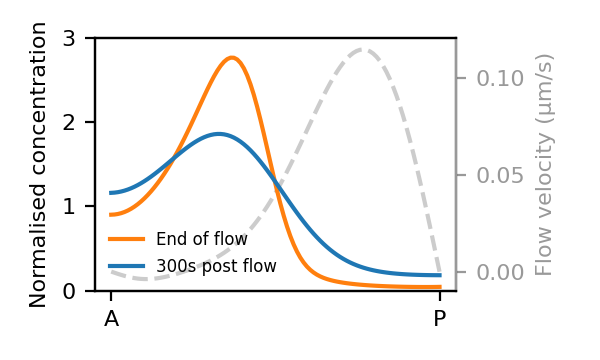

[0.01, 0.005]


<IPython.core.display.Javascript object>


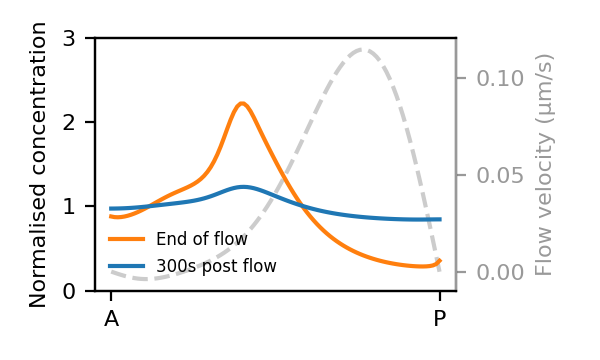

In [8]:
for s, p in zip(solns, params):
    print(p)
    fig, ax1, ax2 = create_fig_v2(s)
    fig.savefig('Figs/profiles_with_flow_%s_%s.png' % (p[0], p[1]), dpi=600, transparent=True)
    fig.savefig('Figs/profiles_with_flow_%s_%s.svg' % (p[0], p[1]), dpi=600, transparent=True)

### Figs - v3

In [66]:
def plot_par3_data(ax):
    data = pd.read_csv('par3_half_profiles.csv', header=None).to_numpy().T
    for i, d in enumerate(data):
        data[i, :] = d / np.mean(d)
    x = np.linspace(0, 60, 50)
    y_mean = np.mean(data, axis=0)
    y_std = np.std(data, axis=0)
    ax.plot(x, y_mean, c='k', zorder=0, linewidth=1)
    ax.fill_between(x, y_mean - y_std, y_mean + y_std, color='k', alpha=0.1, zorder=0, linewidth=0)
   
def create_fig_v3(soln):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_zorder(ax2.get_zorder()+1)
    ax1.patch.set_visible(False)
    ax2.plot(np.linspace(0, 60, 100), flow(), c='0.8', linestyle='--')
    nc = (1 * 1.56) / (1 + 0.174 * 1)
    nc = np.mean(soln[0])
    ax1.plot(np.linspace(0, 60, 100), soln[0] / nc, c='tab:orange', label='End of flow')
    ax1.plot(np.linspace(0, 60, 100), soln[1] / nc, c='tab:blue', label='300s post flow')
    plot_par3_data(ax1)
    
    ax1.tick_params(axis='both', labelsize=8)
    ax2.tick_params(axis='both', labelsize=8)
    ax1.set_xticks([0, 60])
    ax1.set_yticks([0, 1, 2, 3, 4])
    ax1.set_xticklabels(['A', 'P'])
    ax1.set_ylabel('Normalised concentration', fontsize=8)
    ax2.set_ylabel('Flow velocity (µm/s)', fontsize=8, color='0.6')
    ax1.set_ylim(-0.5, 4.5)
    ax1.legend(frameon=False, fontsize=6, loc=3)
    ax1.spines['right'].set_color('0.6')
    ax2.tick_params(axis='y', colors='0.6')
    
    fig.set_size_inches(3.1, 1.8)
    fig.tight_layout()  
    return fig, ax1, ax2

[1, 0.005]


<IPython.core.display.Javascript object>


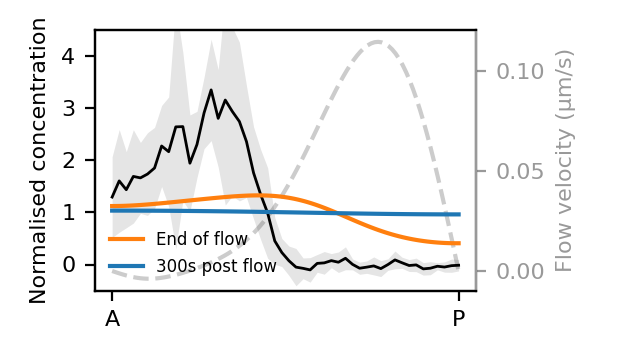

[0.1, 0.005]


<IPython.core.display.Javascript object>


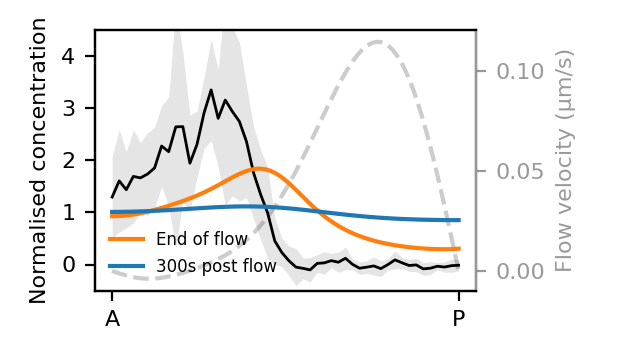

[0.1, 0.05]


<IPython.core.display.Javascript object>


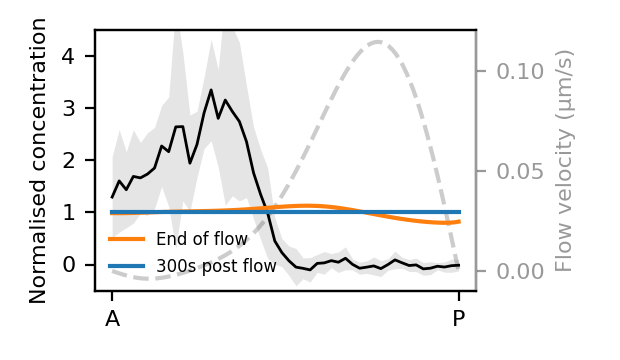

[0.1, 0.0005]


<IPython.core.display.Javascript object>


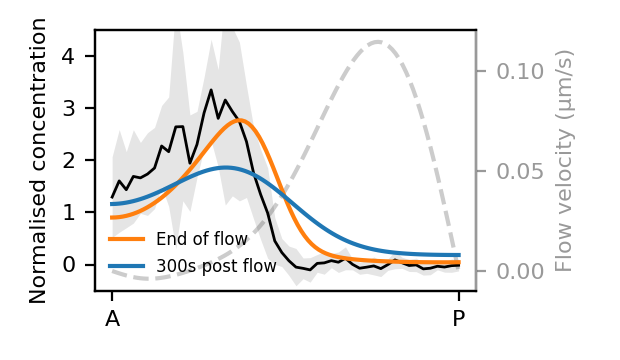

[0.01, 0.005]


<IPython.core.display.Javascript object>


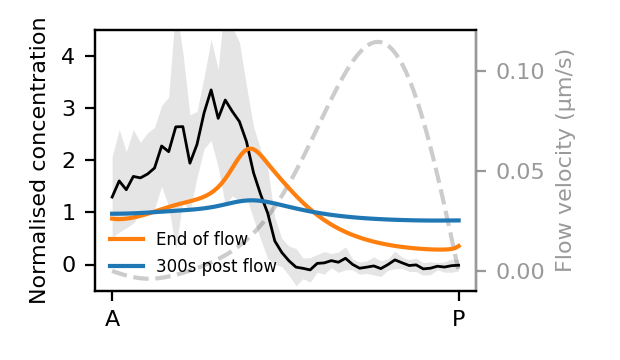

In [67]:
for s, p in zip(solns, params):
    print(p)
    fig, ax1, ax2 = create_fig_v3(s)
    fig.savefig('Figs/profiles_with_flow_and_par3_%s_%s.png' % (p[0], p[1]), dpi=600, transparent=True)
    fig.savefig('Figs/profiles_with_flow_and_par3_%s_%s.svg' % (p[0], p[1]), dpi=600, transparent=True)

### Summary data

In [11]:
def calc_asi(m):
    ant = np.mean(m[:30])
    post = np.mean(m[-30:])
    asi = abs((ant - post) / (2 * (ant + post)))
    return asi

def calc_posterior_depletion(soln, kon, koff, tot=1.56, psi=0.174):
#     starting_p = (kon * tot) / (koff + psi * kon)
    starting_p = np.mean(soln)
    current_p = np.mean(soln[-30:])
    relative_depletion = (starting_p - current_p) / starting_p
    return relative_depletion

In [12]:
asi_segregation = [calc_asi(s[0]) for s in solns]
asi_relaxation = [calc_asi(s[1]) for s in solns]
pd_segregation = [calc_posterior_depletion(s[0], p[1], p[1]) for s, p in zip(solns, params)]
pd_relaxation = [calc_posterior_depletion(s[1], p[1], p[1]) for s, p in zip(solns, params)]
d = [p[0] for p in params]
koff = [p[1] for p in params]

df_dict = {'D': d, 'koff': koff, 'End of flow ASI': asi_segregation, 'End of maintenance ASI': asi_relaxation, 
           'End of flow posterior depletion': pd_segregation, 'End of maintenance posterior depletion': pd_relaxation}

In [13]:
df = pd.DataFrame(df_dict)
df.to_csv('Summary_measurements.csv')
df

,D,koff,End of flow ASI,End of maintenance ASI,End of flow posterior depletion,End of maintenance posterior depletion
0,1.00,0.0050,0.185670,1.562324e-02,0.456920,3.230987e-02
1,0.10,0.0050,0.253952,4.315489e-02,0.631887,1.222360e-01
2,0.10,0.0500,0.033590,8.202355e-09,0.120260,2.877298e-08
3,0.10,0.0005,0.462787,3.631255e-01,0.944758,7.689411e-01
4,0.01,0.0050,0.250703,4.327042e-02,0.642036,1.416089e-01
